# Electrocardiogram Classification using CNN and LSTM

In this notebook, we will create the Neural Network model (CNN layers followed by LSTM layers) to predict different arrhytmia on Electrocardiogram.

Here, we used the MIT-BIH Arrhythmia Database, which obtained from 47 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979.

Kaggle Dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


## Import Dataset

In [3]:
# import train set of the MIT-BIH Arrhythmia Dataset 
mit_train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',
                          header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# import test set of the MIT-BIH Arrhythmia Dataset 
mit_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',
                          header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The last column is the label column with 

In [5]:
# Check the labels in both train and test set
print('train set classes: ', mit_train.iloc[:, -1].unique())
print('train set classes: ', mit_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
train set classes:  [0. 1. 2. 3. 4.]


In [6]:
# Change the dtype of label column to integer
mit_train[187] = mit_train[187].astype('int64')

mit_test[187] = mit_test[187].astype('int64')


In [7]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [8]:
mit_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
# Check for missing values
pd.set_option('display.max_rows', None)
mit_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

**The meaning related to each class:** 

    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"

In [10]:
# See the number of each class in train dataset
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_train.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Train Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [11]:
# See the number of each class in test dataset

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_test.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Test Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Test Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

It seems the distribution of classes on both train and test datasets are same. So we can continue our work with both datasets.

Let's see the Electrocardiogram of first sample, which is a normal class.

<Axes: title={'center': 'ECG of First Person'}>

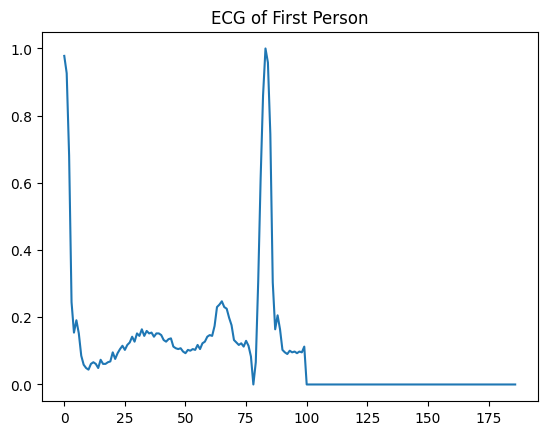

In [12]:
mit_train.iloc[0, :187].plot(title='ECG of First Person')


**Below, we can visulize an ECG from each category.**

In [13]:
# generate a random integer
n = random_index = np.random.randint(100)

ecg_0 = mit_train.loc[mit_train[187]==0, :].iloc[n,:187]
ecg_1 = mit_train.loc[mit_train[187]==1, :].iloc[n,:187]
ecg_2 = mit_train.loc[mit_train[187]==2, :].iloc[n,:187]
ecg_3 = mit_train.loc[mit_train[187]==3, :].iloc[n,:187]
ecg_4 = mit_train.loc[mit_train[187]==4, :].iloc[n,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})


In [14]:
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

## Data Preprocessing

### Data Augmentation
Data augmentation is a technique that increase the size of a training dataset by applying various transformations to existing data samples.

The purpose of data augmentation is to introduce diversity and variability into the training data, which can help improve the performance and generalization of machine learning models. 

#### Balance dataset
First of all, the distribution of out data between different categories is not balanced. Therefore our model will train with unbalanced data and find bias and will be overfit. Balancing the dataset is crucial for building robust and unbiased machine learning models that can effectively generalize to unseen data and provide fair and accurate predictions across all classes.

In [15]:
from imblearn.over_sampling import RandomOverSampler

data = mit_train.iloc[:, :187]
labels = mit_train.iloc[:, 187]

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ros.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [16]:
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label After Balancing"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

We should prepare the data by splitting it into training, validation, and test sets, which are essential for training and evaluating machine learning models. We utilize the train_test_split function from scikit-learn to split the train dataset into training and validation sets with test size of 20%. 

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :187],
                                                train_df.iloc[:, 187],
                                                test_size= 0.2,
                                                stratify=train_df.iloc[:, 187],
                                                random_state=42)

x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [18]:
# Select an array of data instead of dataframe
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

In [19]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187)
y_train shape:  (289884,)
x_val shape:  (72471, 187)
y_val shape:  (72471,)
x_test shape:  (21892, 187)
y_test shape:  (21892,)


## Create The Model

### Add Dimension
Before creating the model architecture, since we are using CNN, we need to add another dimension to our dataset.

In [20]:
# Reshape datasets to use them in CNN 
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_val = x_val.reshape(x_val.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)

### One-Hot Encoding

One-Hot Encoding is typically done when dealing with classification problems where the target labels are represented as integers. One-hot encoding ensures that each class is represented as a binary vector where only one element is 1 (indicating the class) and the rest are 0s. This format is suitable for training neural networks.

In [21]:
import tensorflow as tf

# Converts a class vector (integers) to binary class matrix (one hot encoder).

y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

2024-05-12 21:09:46.457006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 21:09:46.457110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 21:09:46.612111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
# See some samples of data
print(y_train[-1])
print(y_val[-1])
print(y_test[-1])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]


In [23]:
# Check the dataset dimensions again 
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


### CNN + LSTM Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPool1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

The model consists of three CNN layers, each with 64 filters and a kernel size of 6 for the first layer, and 3 for the second and third layers. ReLU activation functions are applied after each convolutional layer. Additionally, batch normalization layers are included after each Conv1D layer to normalize the activations. MaxPooling layers follow each Conv1D layer to reduce the spatial dimensions of the feature maps.

Following the CNN layers, two LSTM layers are added. The first LSTM layer contains 64 units and returns sequences. It utilizes the hyperbolic tangent (tanh) activation function. The second LSTM layer comprises 32 units and also uses the tanh activation function. LSTM layers are commonly employed for processing sequential data such as time series or text.

After the LSTM layers, a Flatten layer is introduced. This layer transforms the output of the LSTM layers into a 1D tensor, which is suitable for input to the Dense layers.

Finally, three Dense (fully connected) layers are appended to the model. The first Dense layer contains 64 units, and the second Dense layer contains 32 units, with ReLU activation applied to both layers. The output Dense layer consists of 5 units with softmax activation, making it suitable for a multi-class classification problem with 5 classes.

.

In [25]:
model_cnn_lstm = Sequential([
    Input(shape=(x_train.shape[1:])),
    
    Conv1D(64, kernel_size=6, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=3, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),

    LSTM(64, return_sequences=True, activation="tanh"),
    
    LSTM(32, activation="tanh"),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
    ])

model_cnn_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 182, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 182, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 89, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 89, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 43, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 22, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,717 (295.77 KB)

 Trainable params: 75,333 (294.27 KB)

 Non-trainable params: 384 (1.50 KB)

Adam optimizer is used, which is an efficient and popular optimization algorithm for training deep neural networks. Categorical crossentropy is chosen as the loss function. 

This loss function is commonly used for multi-class classification problems, where the target variable is categorical and has more than two classes. 

The model's performance during training and evaluation will be monitored using the accuracy metric.

In [26]:
model_cnn_lstm.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

We use callbacks to enhance the training process of the neural network model. 

**EarlyStopping** prevents overfitting by stopping the training process early if the model's performance on the validation set stops improving. It helps to prevent unnecessary computational resources from being spent on training a model that is not improving.

**ReduceLROnPlateau** reduces the learning rate when a metric has stopped improving, allowing the model to proceed with smaller steps towards the minimum of the loss function. This helps to fine-tune the model's performance and avoid overshooting the optimal solution.

In [27]:
callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=8),
             ReduceLROnPlateau(patience=20,
                               monitor='val_loss',
                               min_lr=1e-6,
                               cool_down=20),
             ModelCheckpoint(filepath=r'C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras', 
                             monitor='val_loss',
                             save_best_only=True)]

Now, we can train the model and save its history results in the `history` variable. We choose the number of epochs (complete passes through the entire dataset) for training 10 and batch_size (the number of samples per gradient update) 32.

In [28]:
history = model_cnn_lstm.fit(x_train, y_train, 
                        epochs=10, 
                        callbacks=callbacks, 
                        batch_size=32, 
                        validation_data=(x_val, y_val),
                       verbose=1)

Epoch 1/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 106s 11ms/step - accuracy: 0.8747 - loss: 0.3439 - val_accuracy: 0.9585 - val_loss: 0.1131 - learning_rate: 0.0010
Epoch 2/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 97s 11ms/step - accuracy: 0.9720 - loss: 0.0819 - val_accuracy: 0.9652 - val_loss: 0.1061 - learning_rate: 0.0010
Epoch 3/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 97s 11ms/step - accuracy: 0.9843 - loss: 0.0493 - val_accuracy: 0.9842 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 4/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 98s 11ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9746 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 5/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 98s 11ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9835 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 6/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 98s 11ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9888 - val_loss: 0.0395 - learning_rate: 0.0010
Epoch 7/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 98s 11ms/step - accur

Let's see the change of train loss and validation loss and also change of train accuracy and validation accuracy pro epochs in line plots.

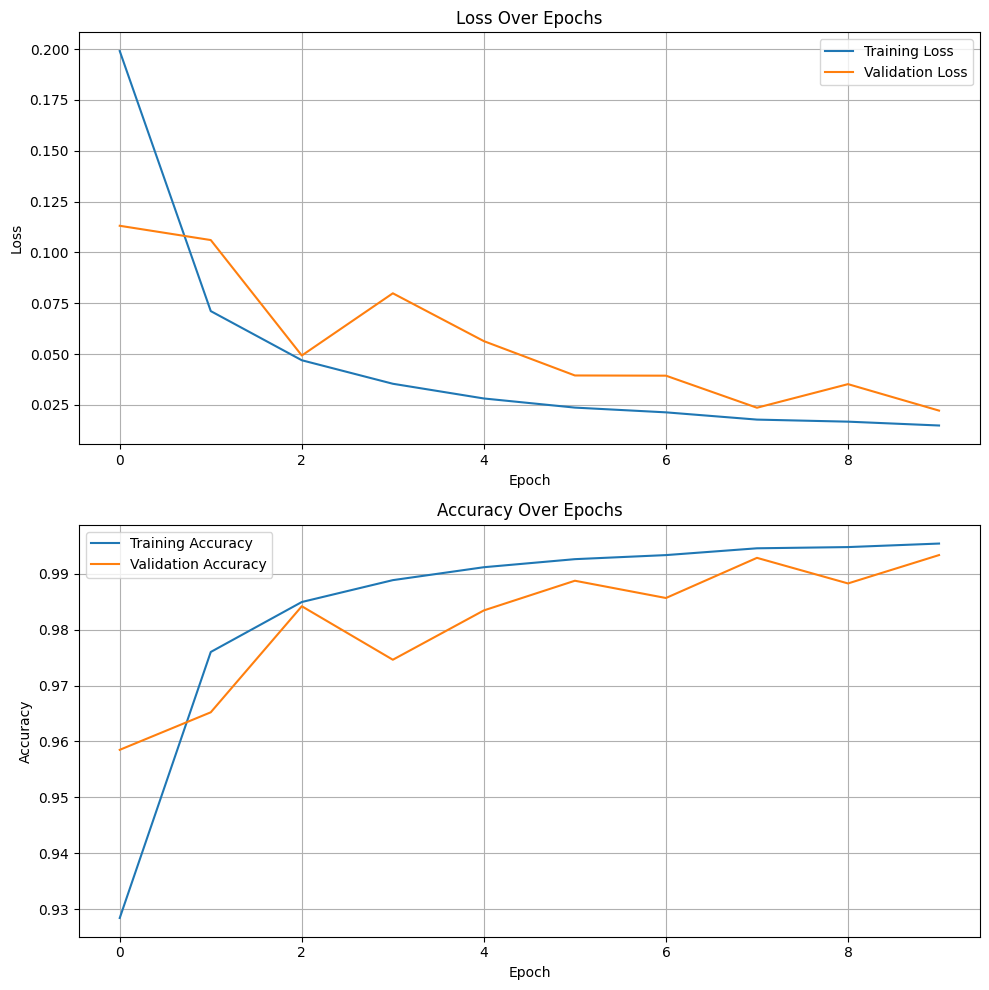

In [29]:
# Plot loss and accuracy of the model
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
# Comprison between the accuracy of model on train and validation datasets
train_score = model_cnn_lstm.evaluate(x_train, y_train)
validation_score = model_cnn_lstm.evaluate(x_val, y_val)

print('Accuracy Train data: ', train_score[1])
print('Accuracy Validation data: ', validation_score[1])

9059/9059 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9951 - loss: 0.0154
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0230
Accuracy Train data:  0.9951015114784241
Accuracy Validation data:  0.9933766722679138


### Predict on Test Dataset

In [31]:
# Predict on the test data
y_pred = model_cnn_lstm.predict(x_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


It is time to evaluating the performance of the model by comparing its predictions (y_pred) against the ground truth labels (y_test) using classification metrics. 

Before that we have to convert one-hot encoded labels to integer labels.

In [32]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.78      0.85      0.81       556
           2       0.96      0.96      0.96      1448
           3       0.73      0.87      0.79       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.89      0.93      0.91     21892
weighted avg       0.98      0.98      0.98     21892



* Precision: This measures the accuracy of the positive predictions. For class 0, it indicates that 99% of the samples predicted as class 0 were actually class 0. Similarly, for class 1, it indicates that 78% of the samples predicted as class 1 were actually class 1, and so on.
* Recall: This measures the ratio of correctly predicted positive observations to the all observations in the actual class. For class 0, it indicates that 99% of the actual class 0 samples were correctly predicted as class 0. Similarly, for class 1, it indicates that 84% of the actual class 1 samples were correctly predicted as class 1, and so on.
* F1-score: This is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, it's 0.99, indicating a high balance between precision and recall for this class. Similarly, for class 1, it's 0.81, and so on.

* Accuracy: This is the overall accuracy of the model, calculated as the ratio of correctly predicted samples to the total number of samples. Here, the accuracy is 98%, indicating that 98% of the samples were correctly classified by the model.

In the below we generate a normalized confusion matrix using the confusion_matrix function from scikit-learn. The confusion matrix is a table that is often used to describe the performance of a classification model. It compares the actual target values with the values predicted by the model.

In [33]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, 
                      normalize='true'
                     )

labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
cm_fig = px.imshow(cm_df, 
                labels=dict(x="Predicted", y="True", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,
                title='Confusion Matrix', 
                color_continuous_scale='Blues'
               )
cm_fig.update_layout(title_x=0.5, width=800, height=600)
cm_fig.show()